----------------------------------
# Case Study: PreOwned car sales using **Linear Regression**
----------------------------------

## Context: 
    
    Background & Context
    
    There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this 
    ## Context: 
    
Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

------------------------------

## Problem:

**The data-set aims to answer the following key questions:**


Perform an Exploratory Data Analysis on the data
- Univariate analysis - Bivariate analysis - Use appropriate visualisations to identify the patterns and insights - Any other exploratory deep dive
5

Illustrate the insights based on EDA
Key meaningful observations on the relationship between variables
5

Data pre-processing
Prepare the data for analysis - Missing value Treatment, Outlier Treatment, Feature Engineering
15

Model building - Linear Regression
- Build the model and comment on the model statistics - Identify the key variables that have a strong relationship with dependent variable
10

Test assumptions of linear regression model
- Perform tests for the assumptions of the linear regression - Comment on the findings from the test
10

Model performance evaluation
- Evaluate the model on different performance metrics - RMSE, MAE, Adjusted R-square - Comment on the performance measures and if there is any need to improve the model or not
5

Actionable Insights & Recommendations
- Conclude with the key takeaways for the business - what would your advice be to grow the business?


- 

------------------------------

## Attribute Information:

Data Dictionary 

S.No. : Serial Number

Name : Name of the car which includes Brand name and Model name

Location : The location in which the car is being sold or is available for purchase Cities

Year : Manufacturing year of the car

Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.

Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

Transmission : The type of transmission used by the car. (Automatic / Manual)

Owner : Type of ownership

Mileage : The standard mileage offered by the car company in kmpl or km/kg

Engine : The displacement volume of the engine in CC.

Power : The maximum power of the engine in bhp.

Seats : The number of seats in the car.

New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)

Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

------------------------
# Concepts to Cover
------------------------
- 1. Overview of the data
- 2. Data Visualization
- 3. Data Preparation
- 4. Choose Model, Train and Evaluate
- 5. Conclusion
- 6. Add-on: Statsmodels

# Let's start coding!

### Import libraries

In [1046]:
# Import necessary libraries.
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

### Load and explore the data

In [1047]:
# Load the data into pandas dataframe
path = "used_cars_data.csv"
data = pd.read_csv(path)              # Make changes to the path depending on where your data file is stored.

### Overview of the data

In [1048]:
# let us make another copy of data
df = data.copy()
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,NaN,17.74


### Check number of rows and columns

In [1049]:
df.shape

(7253, 14)

### Lets us Have a look at the column names

In [1050]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

### Check column types and missing values

In [1051]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


**Observations**
* There are 7253 rows and 14 columns
* Column names have spaces and spacial characters which we would fix
* Status is categorical variable and all other variables are numerical type
* Dependent Variable is Price

### Lets us look at missing values

In [1052]:
df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

### let us fix missing values

In [1053]:
# we will replace missing values in every column with its medain
#medianFiller = lambda x: x.fillna(x.median())
#numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
#df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)
#df.head(10)

In [1054]:
df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [1055]:
#drop column new price 
df.drop('New_Price', axis = 1, inplace=True)
df.drop('S.No.', axis = 1, inplace=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,nan
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00,nan
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00,nan
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00,nan


In [1056]:
#now dropna
df.dropna(axis =0, inplace=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.00,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.00,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.00,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.00,2.65


In [1057]:
#Remove Text from Numericals. Not Converting km/kg to kmpl, as mentioned on project discussion 

df1 = df.copy()
df1['Mileage'] = df1['Mileage'].replace(to_replace=r'kmpl', value='', regex=True)
df1['Mileage'] = df1['Mileage'].replace(to_replace=r'km/kg', value='', regex=True)
df1['Engine'] = df1['Engine'].replace(to_replace=r' CC', value='', regex=True)
df1['Power'] = df1['Power'].replace(to_replace=r' bhp', value='', regex=True)
#df1['New_Price'] = df1['New_Price'].replace(to_replace=r'Lakh', value='', regex=True)
df1


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.00,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.00,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.00,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.00,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.00,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.00,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.00,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.00,2.65


In [1058]:
df1.isna().sum() ##to confirm all non null values

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [1059]:
#Creat a Car Model label with Year and Name columns 
df1['Model'] = df1['Year'].astype(str) + ' ' + df1['Name']
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.00,1.75,2010 Maruti Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.00,12.50,2015 Hyundai Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.00,4.50,2011 Honda Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.00,6.00,2012 Maruti Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.00,17.74,2013 Audi A4 New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.00,4.75,2014 Maruti Swift VDI
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.00,4.00,2015 Hyundai Xcent 1.1 CRDi S
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.00,2.90,2012 Mahindra Xylo D4 BSIV
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.00,2.65,2013 Maruti Wagon R VXI


In [1060]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Model              5975 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 653.5+ KB


In [1061]:
#medianFiller = lambda x: x.fillna(x.median())
#numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
#df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)
#df.head(10)

In [1062]:
df1['Power'].isnull().sum()

0

In [1063]:
#data.loc[ data['Seats'] <5, 'Seats'] =0
#df1['Power'] = df1['Power'].fillna(1200)
#df1.loc[df1['Power'] == 'null'] = 'NaN'
#data['Engine'] = data["Engine"].fillna(1200)
#df1['Power'] = df1['Power'].astype('float64')

In [1064]:
#To check what is value stopping float conversion
df1.sort_values(by=['Power'],ascending=False).head(60)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086,null,5.00,1.12,2007 Hyundai Santro Xing XP
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436,null,2.00,40.00,2010 Porsche Cayman 2009-2012 S
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0,1086,null,5.00,2.10,2007 Hyundai Santro Xing XO
5458,Maruti Swift VDI BSIV,Hyderabad,2014,81609,Diesel,Manual,First,17.8,1248,null,5.00,5.55,2014 Maruti Swift VDI BSIV
1672,Nissan Micra Diesel,Jaipur,2011,80000,Diesel,Manual,Second,19.5,1461,null,5.00,2.10,2011 Nissan Micra Diesel
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5,1798,null,5.00,2.85,2010 Skoda Laura Classic 1.8 TSI
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086,null,5.00,1.17,2008 Hyundai Santro Xing XP
3645,Hyundai Santro Xing XP,Bangalore,2004,167000,Petrol,Manual,First,0.0,1086,null,5.00,1.35,2004 Hyundai Santro Xing XP
3638,Honda CR-V Sport,Hyderabad,2010,67758,Petrol,Manual,First,10.8,2354,null,5.00,9.50,2010 Honda CR-V Sport
1649,Toyota Etios Liva GD,Pune,2011,32000,Diesel,Manual,First,23.59,1364,null,5.00,3.85,2011 Toyota Etios Liva GD


In [1065]:
#df1['Power'].f(df1['Power'].mode(), inplace = True)
#df1['Power'] = df1['Power'].replace(['Null'], 1000)
#df1['Power'] = df1['Power'].replace(['None'], 1000)
#df1['Power'].mode()
#df1[(df1.Power != 'null') & (df1.Power != 'None')]

df1.drop(df1[df1.Power == 'null'].index, inplace=True)
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.00,1.75,2010 Maruti Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.00,12.50,2015 Hyundai Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.00,4.50,2011 Honda Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.00,6.00,2012 Maruti Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.00,17.74,2013 Audi A4 New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.00,4.75,2014 Maruti Swift VDI
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.00,4.00,2015 Hyundai Xcent 1.1 CRDi S
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.00,2.90,2012 Mahindra Xylo D4 BSIV
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.00,2.65,2013 Maruti Wagon R VXI


In [1066]:
df1.sort_values(by=['Power'],ascending=False).head(60)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
5844,Tata Indigo XL Grand Petrol,Pune,2008,52000,Petrol,Manual,Second,12.85,1396,99.6,5.00,1.30,2008 Tata Indigo XL Grand Petrol
3409,Renault Scala RxL AT,Mumbai,2013,7000,Petrol,Automatic,First,17.97,1498,99.6,5.00,3.65,2013 Renault Scala RxL AT
3772,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,27000,Petrol,Automatic,First,17.97,1498,99.6,5.00,6.75,2015 Nissan Sunny 2011-2014 XL AT Special Edition
5442,Nissan Sunny XL CVT,Hyderabad,2014,32000,Petrol,Automatic,First,17.97,1498,99.6,5.00,7.99,2014 Nissan Sunny XL CVT
671,Nissan Sunny XV CVT,Kochi,2013,37199,Petrol,Automatic,First,17.5,1498,99.6,5.00,5.43,2013 Nissan Sunny XV CVT
762,Ford Figo Titanium Diesel,Kolkata,2015,72035,Diesel,Manual,First,25.5,1498,99,5.00,2.50,2015 Ford Figo Titanium Diesel
4241,Ford Figo 2015-2019 1.5D Titanium Plus MT,Hyderabad,2015,45000,Diesel,Manual,First,25.83,1498,99,5.00,5.50,2015 Ford Figo 2015-2019 1.5D Titanium Plus MT
3576,Ford Figo 2015-2019 1.5D Titanium MT,Hyderabad,2016,71000,Diesel,Manual,First,25.83,1498,99,5.00,5.10,2016 Ford Figo 2015-2019 1.5D Titanium MT
5938,Ford Figo Aspire 1.5 TDCi Titanium Plus,Kochi,2016,33554,Diesel,Manual,First,25.83,1498,99,5.00,6.22,2016 Ford Figo Aspire 1.5 TDCi Titanium Plus
3989,Ford Figo 2015-2019 1.5D Ambiente MT,Chennai,2016,70000,Diesel,Manual,First,25.83,1498,99,5.00,4.60,2016 Ford Figo 2015-2019 1.5D Ambiente MT


In [1067]:
#medianFiller = lambda x: x.fill()
#df1[df1['Power']=='null'] = df1['Power'].df1[df1['Engine']>1000].mean()
#df1[df1['Engine']>1000].head(50)

In [1068]:
df1['Year'] = df1['Year'].astype('int64')
df1['Fuel_Type'] = df1['Fuel_Type'].astype('category')
df1['Transmission'] = df1['Transmission'].astype('category')
df1['Owner_Type'] = df1['Owner_Type'].astype('category')
df1['Mileage'] = df1['Mileage'].astype('float64')
df1['Engine'] = df1['Engine'].astype('int64')
df1['Power'] = df1['Power'].astype('float64')
df1['Seats'] = df1['Seats'].astype('category')
df1['Model'] = df1['Model'].astype('category')

In [1069]:
#To see the disctribution for cars of same model
grouped_model = df1.groupby('Model').agg({'Price': ['mean', 'min', 'max']})
print(grouped_model)

                                       Price            
                                        mean   min   max
Model                                                   
1998 Maruti Zen LX                      0.53  0.53  0.53
1998 Maruti Zen LXI                     0.45  0.45  0.45
1998 Mercedes-Benz E-Class 250 D W 210  3.90  3.90  3.90
1999 Honda City 1.3 EXI                 0.90  0.90  0.90
1999 Maruti Zen VX                      0.77  0.77  0.77
...                                      ...   ...   ...
2019 Toyota Innova Crysta 2.4 VX MT    22.20 22.20 22.20
2019 Toyota Innova Crysta 2.4 VX MT 8S 21.98 21.42 22.55
2019 Toyota Innova Crysta 2.8 GX AT    19.56 19.40 19.65
2019 Toyota Innova Crysta 2.8 ZX AT    24.82 24.82 24.82
2019 Volkswagen Polo 1.0 MPI Trendline  5.68  5.68  5.68

[3714 rows x 3 columns]


In [1070]:
# Check the unique values in each column of the dataframe.
df1.nunique()

Name                 1811
Location               11
Year                   22
Kilometers_Driven    3038
Fuel_Type               4
Transmission            2
Owner_Type              4
Mileage               429
Engine                139
Power                 368
Seats                   8
Price                1364
Model                3714
dtype: int64

### Lets look at summary of our data

In [1071]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # to display numbers in digits
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5872,1811,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5872,11,Mumbai,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5872.00,NaN,NaN,NaN,2013.48,3.16,1998.00,2012.00,2014.00,2016.00,2019.00
Kilometers_Driven,5872.00,NaN,NaN,NaN,58317.00,92169.41,171.00,33422.50,52609.00,72402.75,6500000.00
Fuel_Type,5872,4,Diesel,3152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5872,2,Manual,4170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5872,4,First,4839,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5872.00,NaN,NaN,NaN,18.28,4.37,0.00,15.26,18.20,21.10,33.54
Engine,5872.00,NaN,NaN,NaN,1625.75,601.64,624.00,1198.00,1495.50,1991.00,5998.00
Power,5872.00,NaN,NaN,NaN,113.28,53.88,34.20,75.00,97.70,138.10,560.00


1. 2014 Maruti Swift VDI is the most popular car in the dataset
2. Some ouliers in price and engine size exist. We can investigate further to drop them


In [1072]:
df1[df1['Price']>100] 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993,255.00,5.00,160.00,2017 Land Rover Range Rover 3.0 Diesel LWB Vogue
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204,560.00,2.00,120.00,2011 Lamborghini Gallardo Coupe


1. Looks like credible outlier. We may leave them in

In [1073]:
df1[df1['Name'].str.match('Mahindra XUV500 W8 2WD')].count() #55 of this car spread over many years
df1[df1['Model'].str.match('2014 Maruti Swift VDI$')] #to verify frequency column above


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
574,Maruti Swift VDI,Chennai,2014,35000,Diesel,Manual,First,22.90,1248,74.00,5.00,5.25,2014 Maruti Swift VDI
1530,Maruti Swift VDI,Delhi,2014,56000,Diesel,Manual,First,22.90,1248,74.00,5.00,4.25,2014 Maruti Swift VDI
1769,Maruti Swift VDI,Pune,2014,75216,Diesel,Manual,First,22.90,1248,74.00,5.00,5.10,2014 Maruti Swift VDI
1946,Maruti Swift VDI,Coimbatore,2014,83274,Diesel,Manual,First,22.90,1248,74.00,5.00,5.79,2014 Maruti Swift VDI
2345,Maruti Swift VDI,Hyderabad,2014,85512,Diesel,Manual,First,22.90,1248,74.00,5.00,5.80,2014 Maruti Swift VDI
2950,Maruti Swift VDI,Kolkata,2014,35010,Diesel,Manual,First,22.90,1248,74.00,5.00,3.50,2014 Maruti Swift VDI
3202,Maruti Swift VDI,Delhi,2014,50000,Diesel,Manual,First,22.90,1248,74.00,5.00,4.30,2014 Maruti Swift VDI
3786,Maruti Swift VDI,Pune,2014,115000,Diesel,Manual,First,28.40,1248,74.00,5.00,4.50,2014 Maruti Swift VDI
4772,Maruti Swift VDI,Kolkata,2014,47000,Diesel,Manual,First,22.90,1248,74.00,5.00,3.90,2014 Maruti Swift VDI
4831,Maruti Swift VDI,Kolkata,2014,25000,Diesel,Manual,First,22.90,1248,74.00,5.00,3.95,2014 Maruti Swift VDI


## Univaraite analysis

In [1074]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Lets expore dependent varaible life price

In [1075]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.00,1.75,2010 Maruti Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.00,12.50,2015 Hyundai Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.00,4.50,2011 Honda Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.00,6.00,2012 Maruti Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.00,17.74,2013 Audi A4 New 2.0 TDI Multitronic


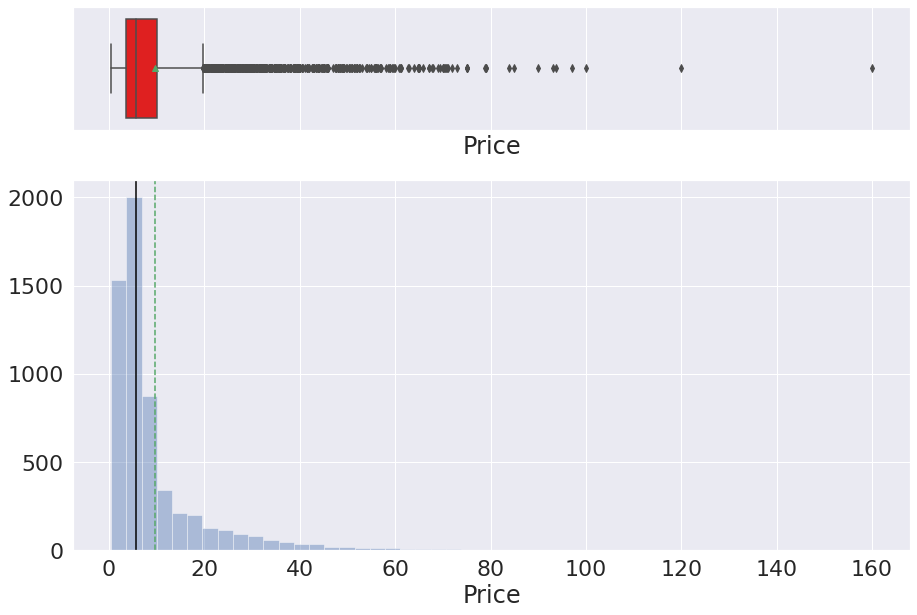

In [1076]:
histogram_boxplot(df1.Price)

**Observation**

- Price is right skewed which means there are lot of expensive cars in dataset
- Mean price is around 10 lakhs




### lets us explore Engine size of used cars

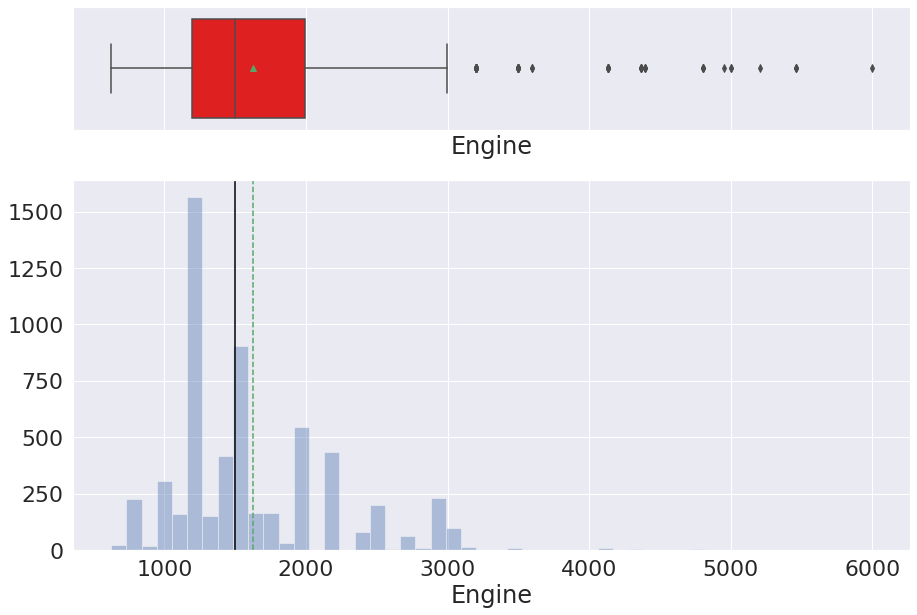

In [1077]:
histogram_boxplot(df1.Engine)

* The average engine szie is 1500cc
* There are lot of outliers 
* The distribution is right skewed

## Distribution of each numerical variable.

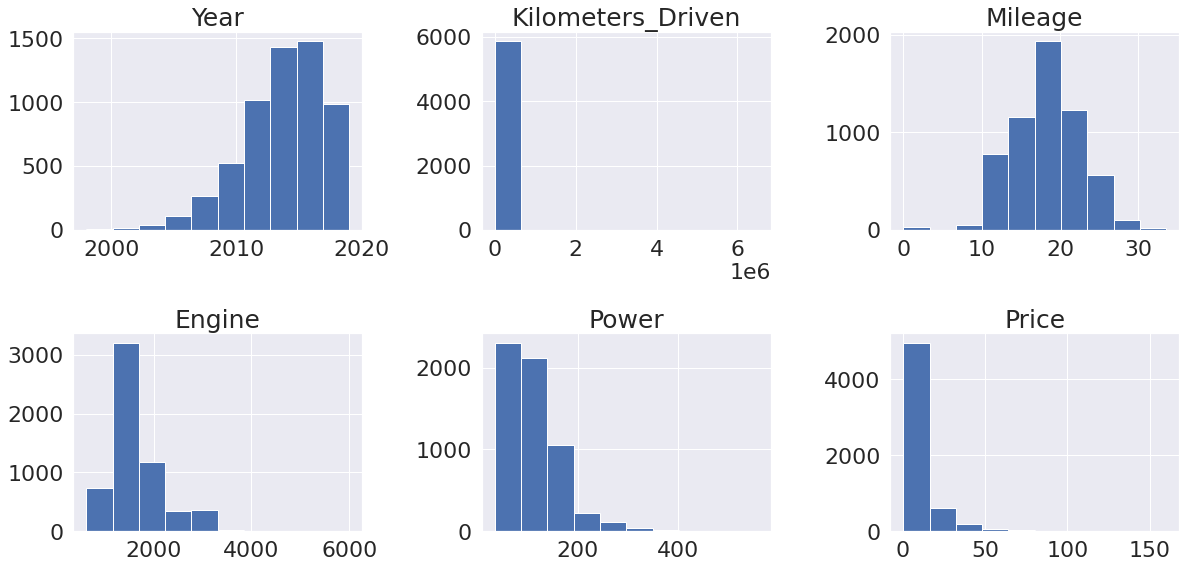

In [1078]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df1[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    
plt.show()

**Observation**
* Year, Mileage, Enginesize of the car is somewhat normal distribution
* Year is left skewed and rest are right skewed
* Interpretation of left and right skewed
  -  Most of the features are rigt skewed with lot of extreme outliers

## Lets look at outliers in every numerical column

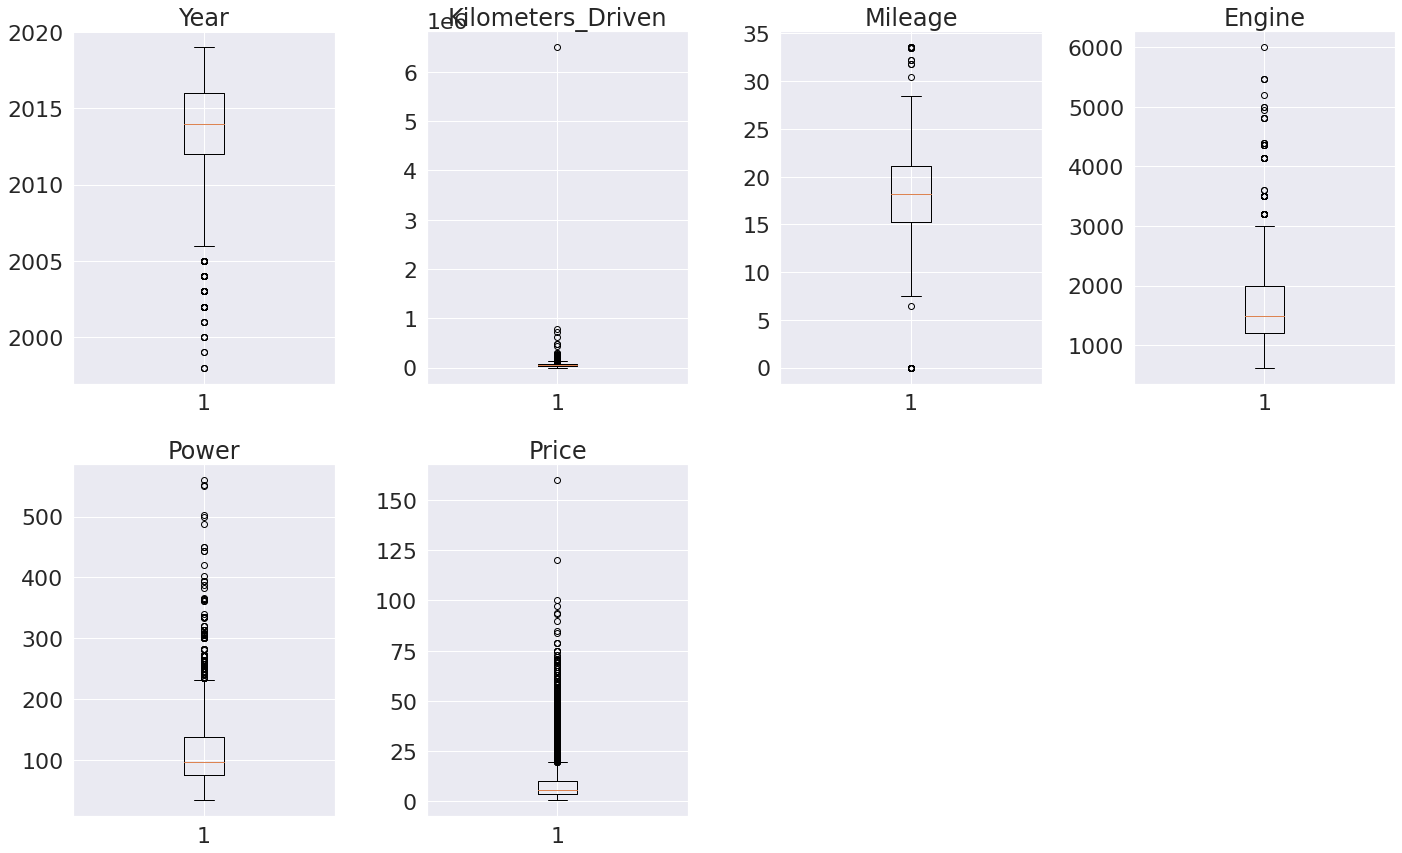

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']


In [1079]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df1[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()
print(numeric_columns)

* Year has lower outliers while all other numerical features have upper outliers
* We will treat these outliers as these might adversely affect the predictive power of linear model however in real life these outliers may be due to non-linear pattern in the data set or can be important information. Some time outliers in the independent variable can be adversely impact the linear model, this we can come to know by building model with and with outliers and comparing the model performances.

**bold text**# Bivariate Analysis

# Let us look at correlations

In [1080]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.00,1.75,2010 Maruti Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.00,12.50,2015 Hyundai Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.00,4.50,2011 Honda Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.00,6.00,2012 Maruti Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.00,17.74,2013 Audi A4 New 2.0 TDI Multitronic


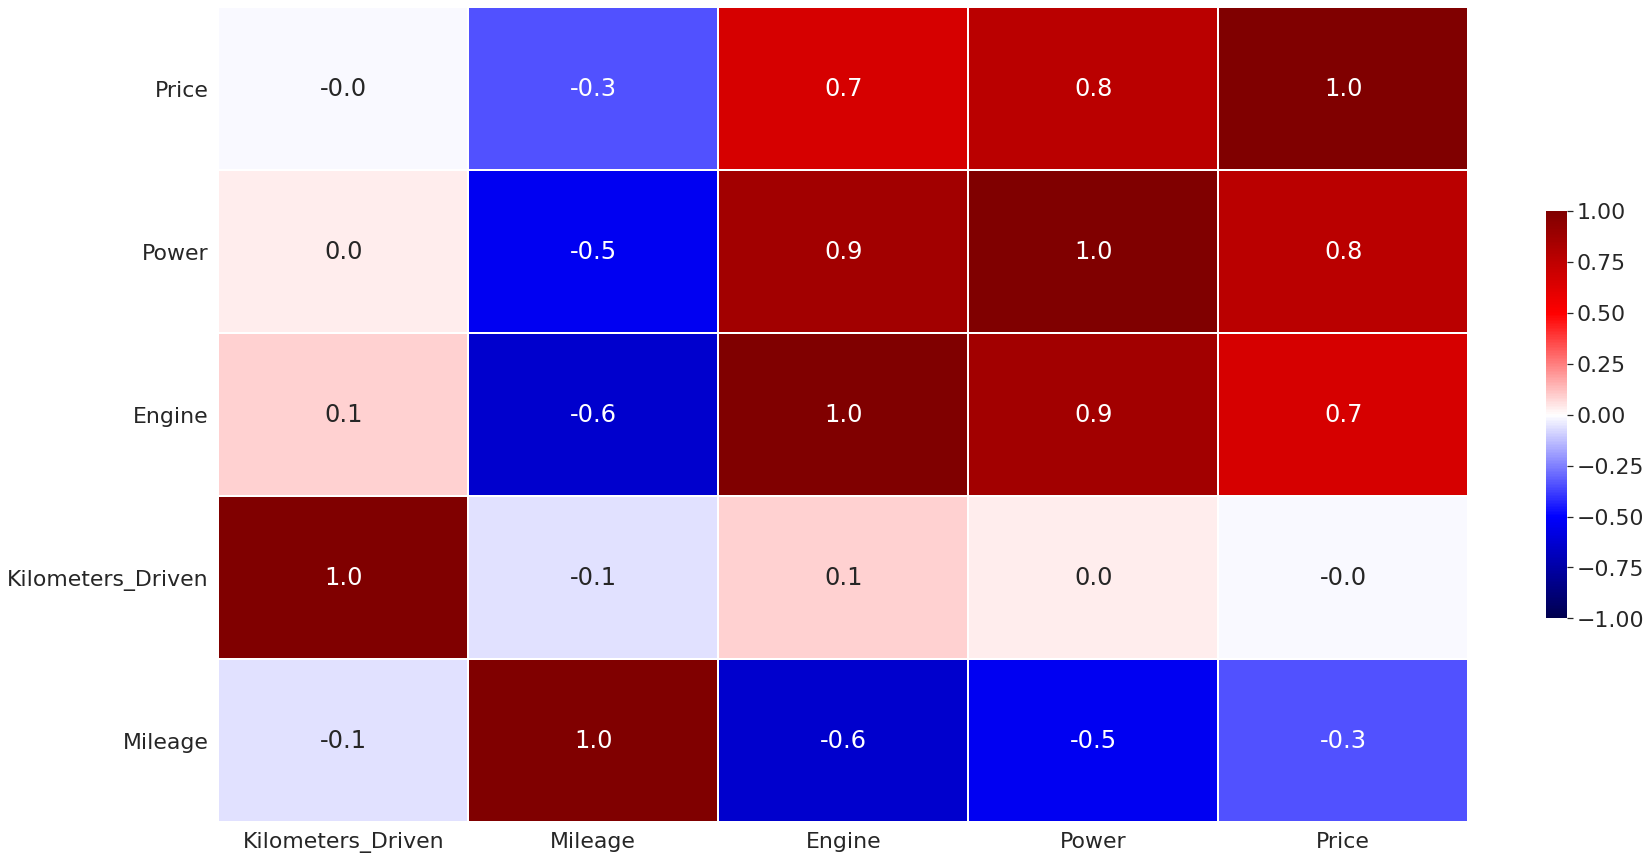

In [1081]:
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('Year') # dropping year column as it is temporal variable
corr = df1[numeric_columns].corr().sort_values(by=['Price'],ascending=False) # sorting correlations w.r.t life expectancy  
#corr = df.corr().sort_values(by=['Price'],ascending=False)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

**Observations**
* Price is  negatively correlated with Mileage, which is intuitive as expensive performance generally have low mileage
* Price is highly positively correlated with Power and Engine, which is intuitive as the expensive perfomance cars have high Power and Engine capacity


## Let us look at the graph of those variables that are highly correlated with price

### Price vs Power

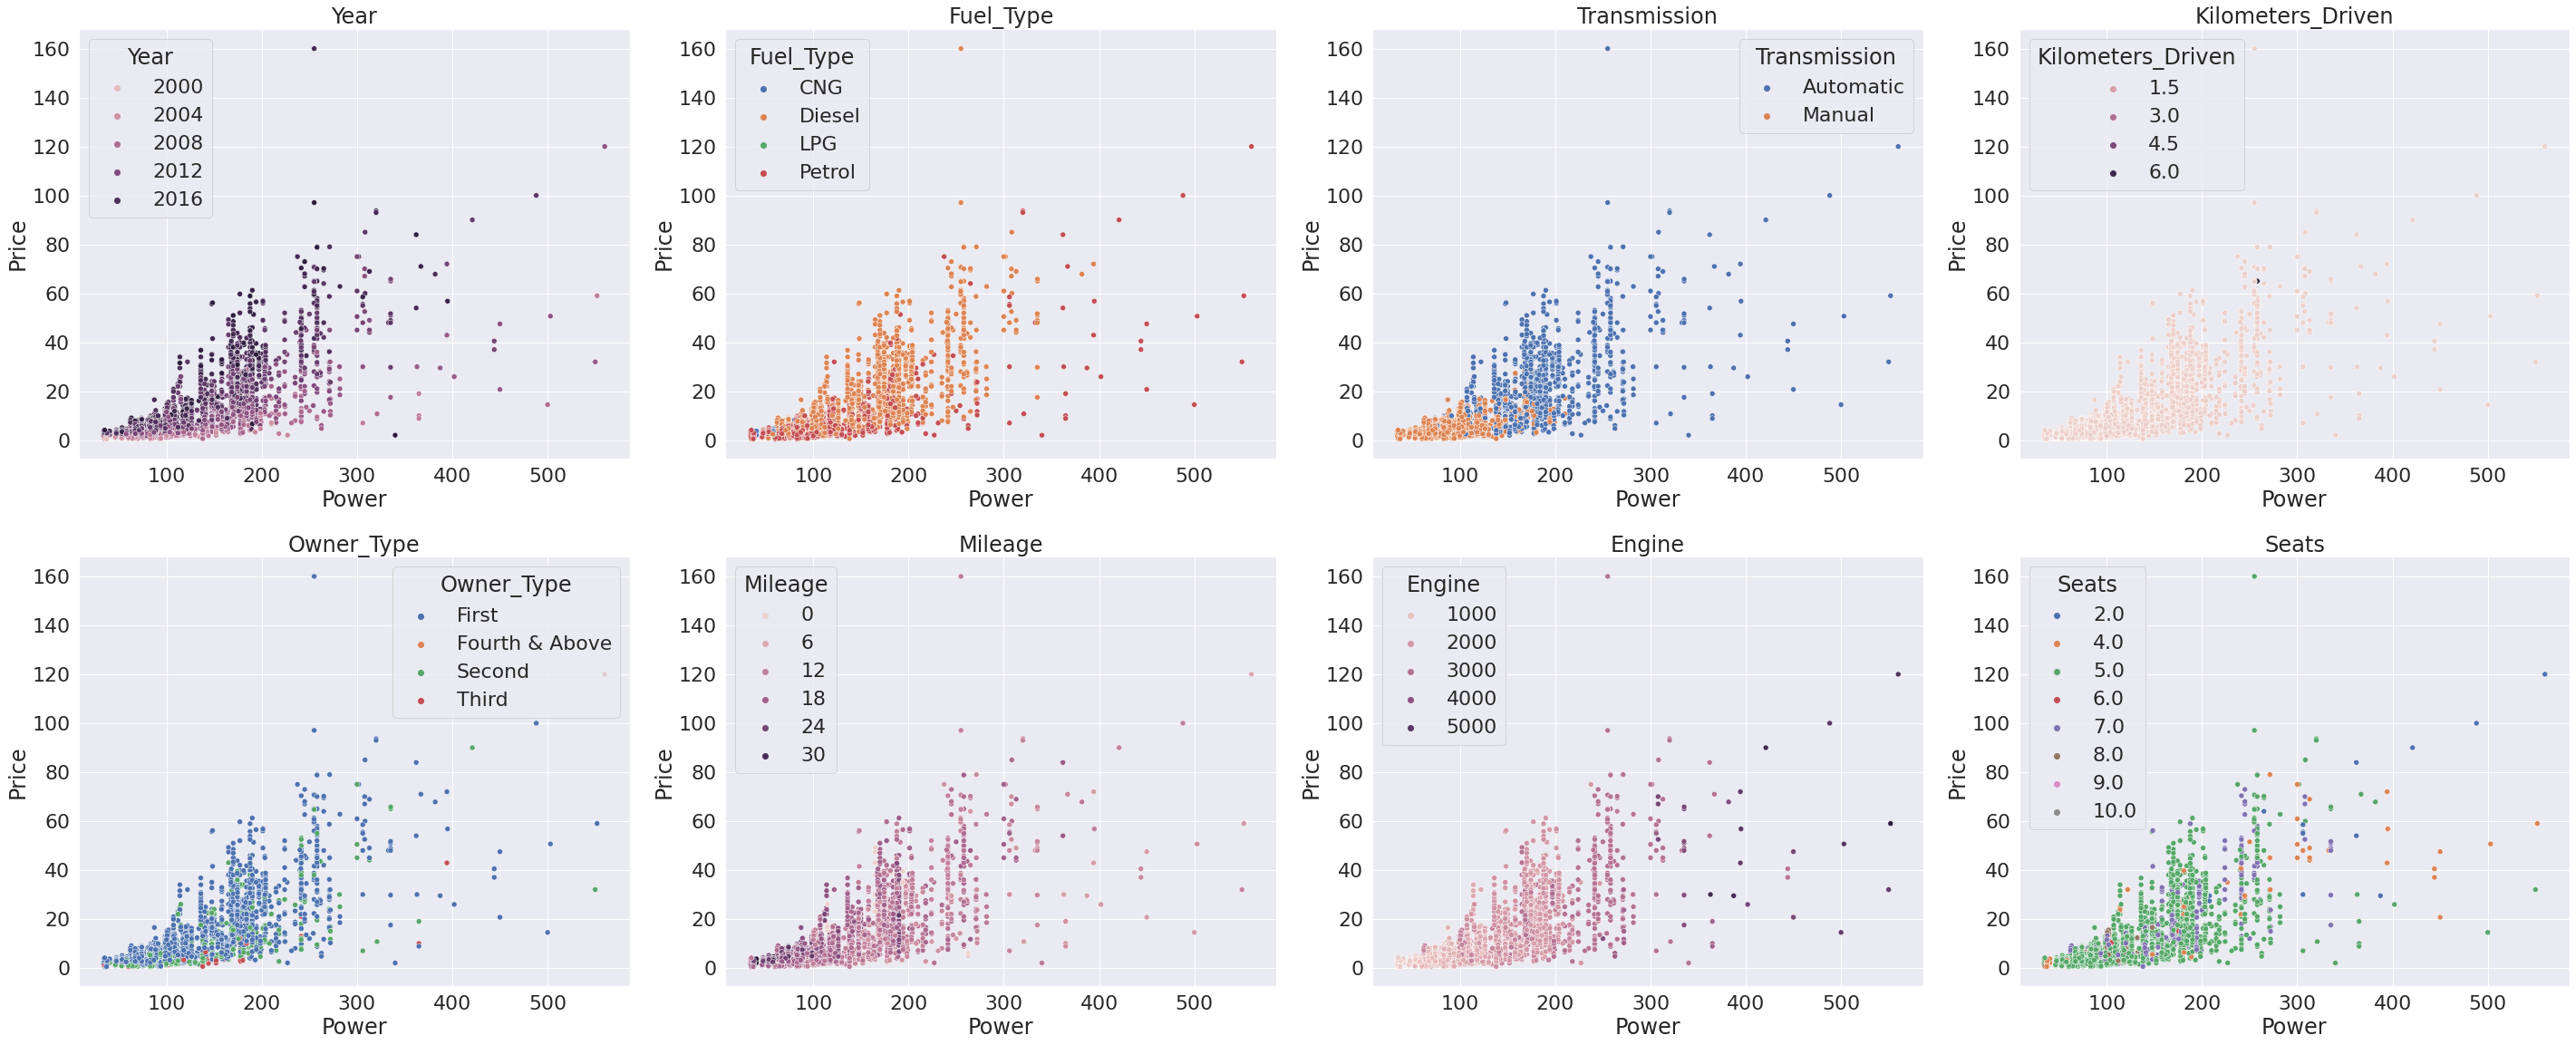

In [1082]:
plt.figure(figsize=(40,40))
hue_columns = ['Year', 'Fuel_Type', 'Transmission', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Seats']

#for i in range(0,9):
for i, variable in enumerate(hue_columns):
                     plt.subplot(5,4,i+1)
                     sns.scatterplot(y='Price', x='Power', hue = hue_columns[i], data=df1);
                     plt.tight_layout()
                     plt.title(variable)

plt.show()


* As expected, the older cars are priced lower and higher performance cars, with higher power, are priced higher. 

Price vs Engine

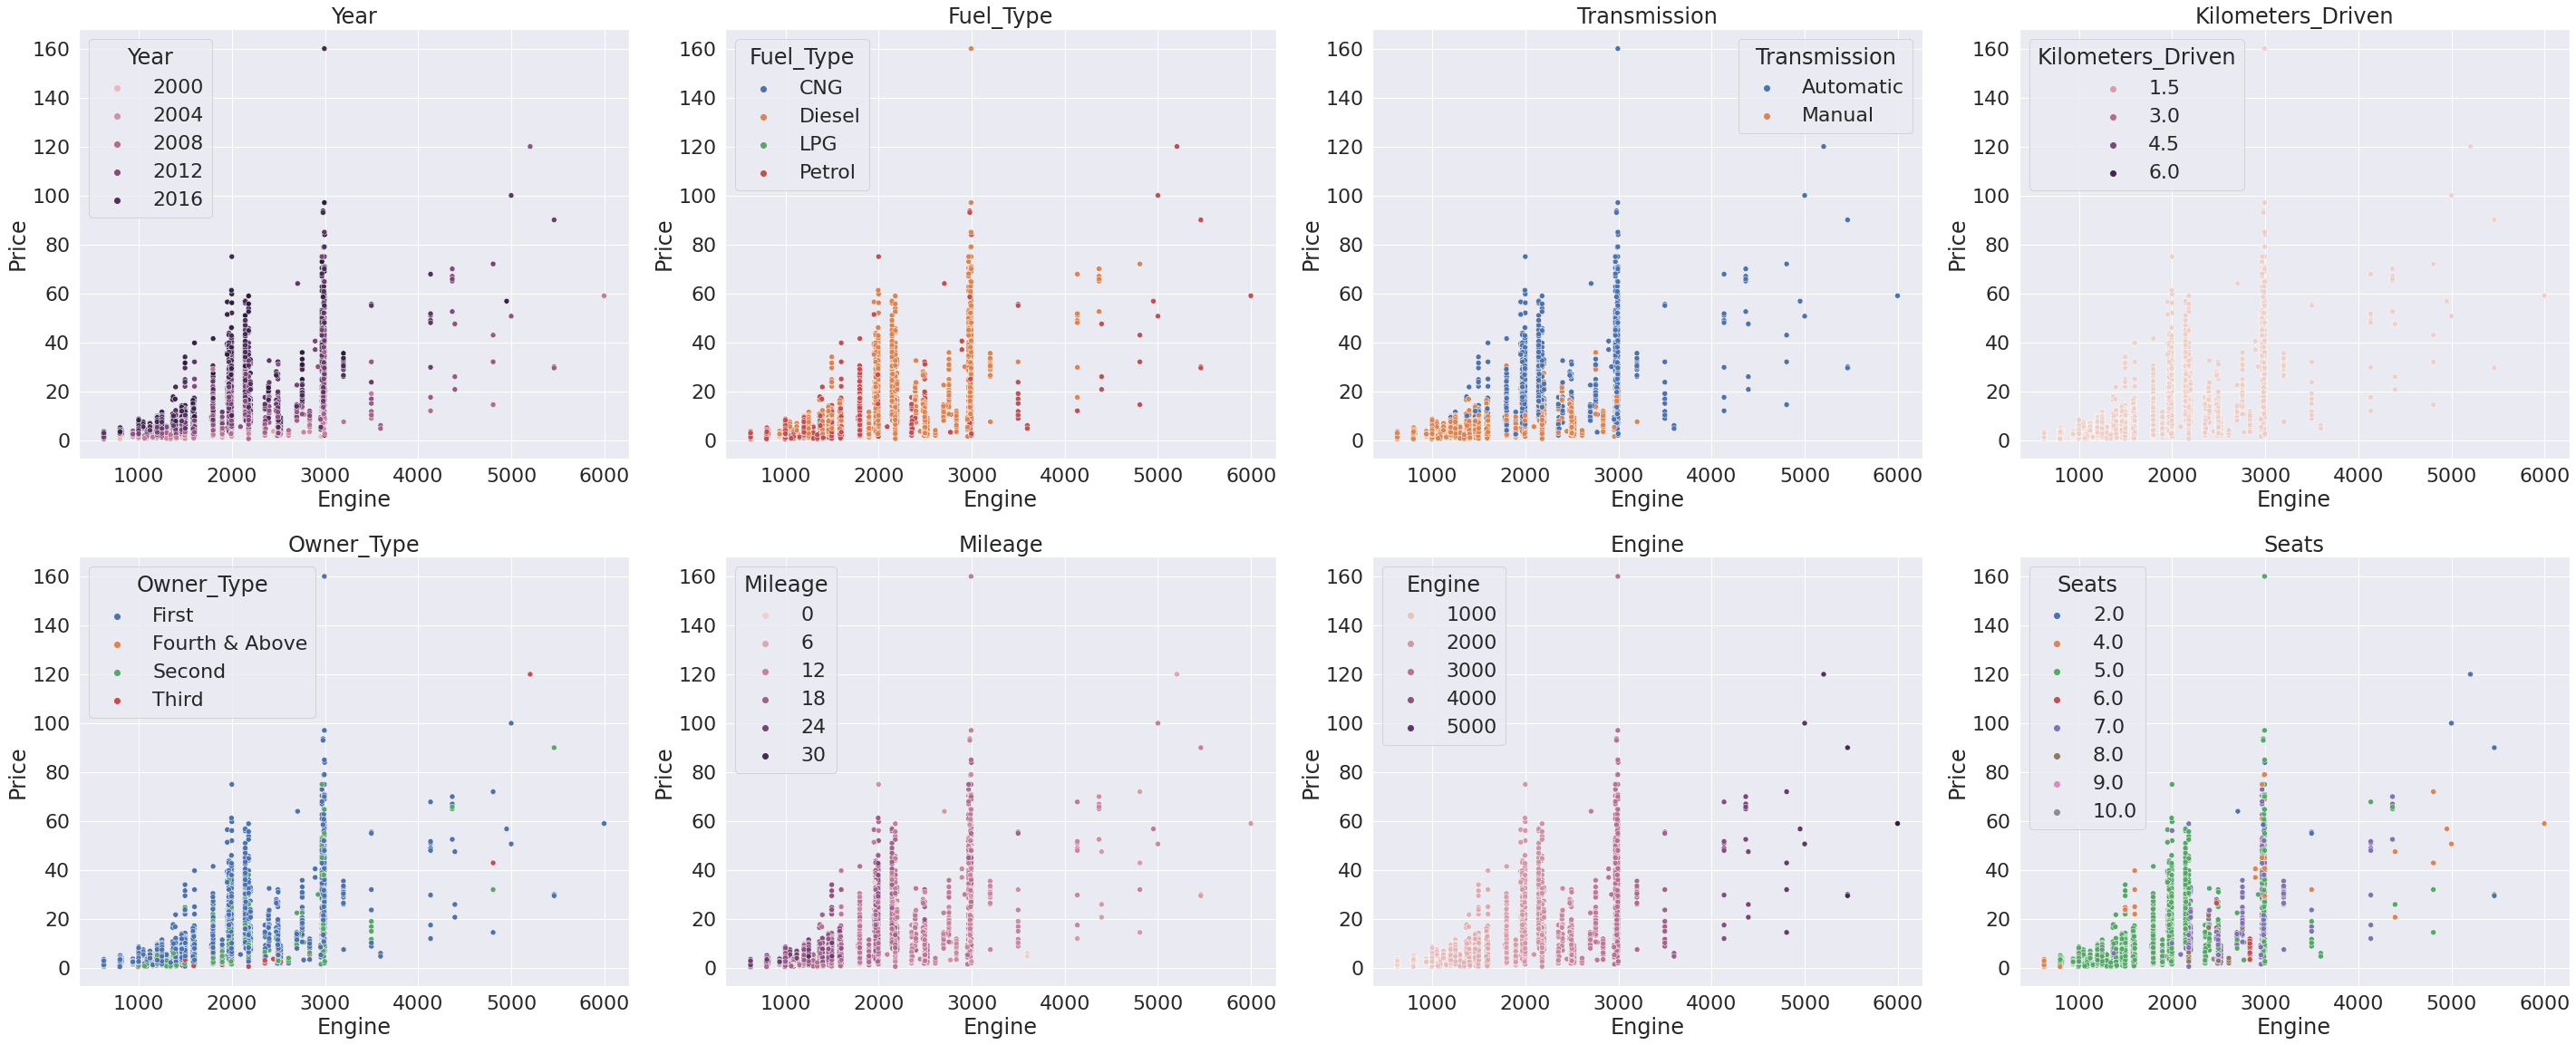

In [1083]:
plt.figure(figsize=(40,40))
hue_columns = ['Year', 'Fuel_Type', 'Transmission', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Seats']

#for i in range(0,9):
for i, variable in enumerate(hue_columns):
                     plt.subplot(5,4,i+1)
                     sns.scatterplot(y='Price', x='Engine', hue = hue_columns[i], data=df1);
                     plt.tight_layout()
                     plt.title(variable)

plt.show()


** Observation**

- The life expectancy in the developed countries is much higher than the developing countries.
- The median value of life expectancy (approximately as can be seen from the boxplot) for:
     - Developing: 69 years
     - Developed: 78 years
- Asian developed countries have life expectancy higher than European and north American developed countries


# Data Preparation

## Fix data type

## Outliers Treatment

In [1085]:
df=df1

In [1086]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

### Treating the outiers

In [1087]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

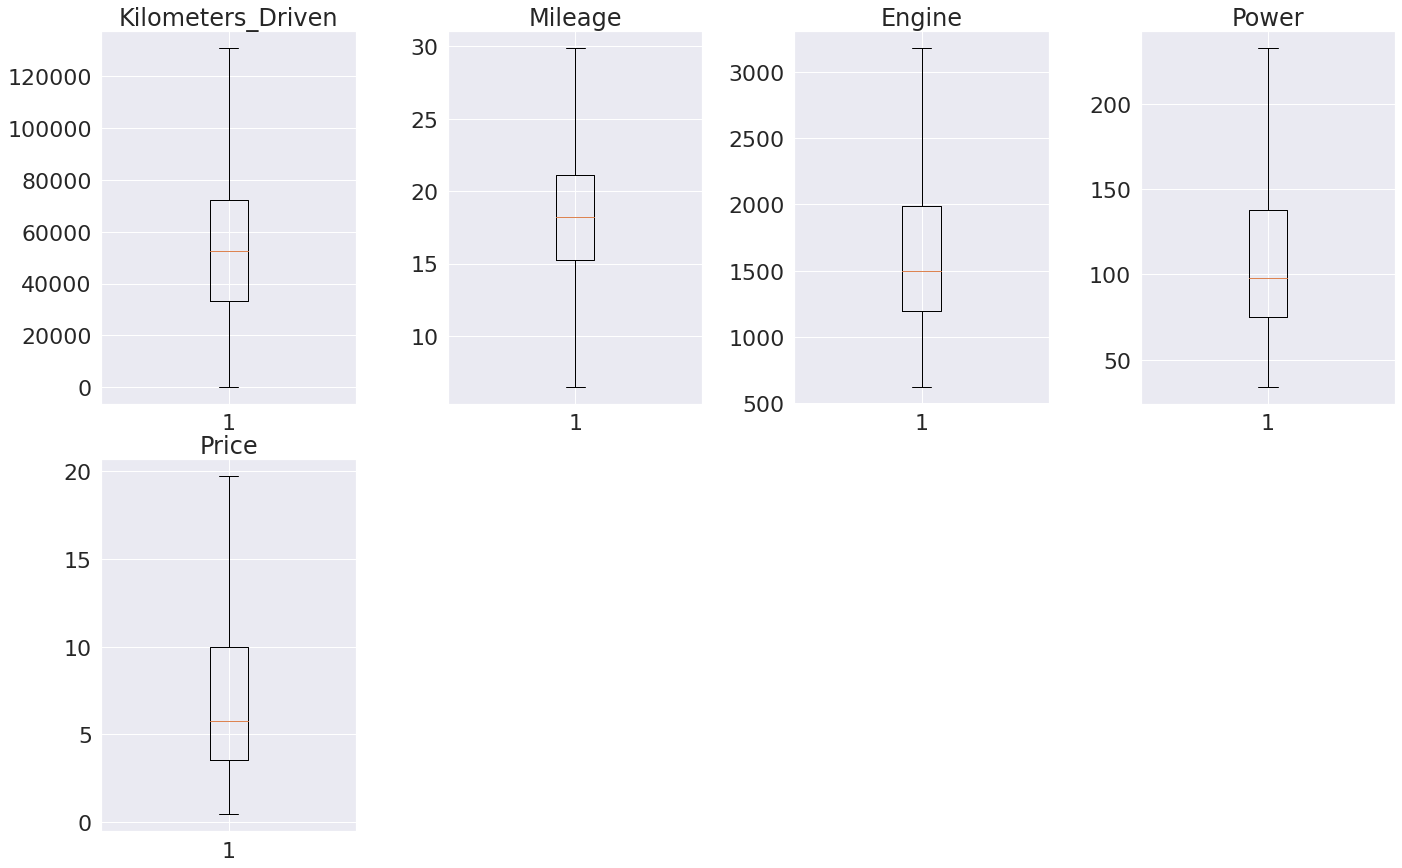

In [1088]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* Outliers has been treated

# Model Building

In [1089]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.00,CNG,Manual,First,26.60,998.00,58.16,5.00,1.75,2010 Maruti Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.00,Diesel,Manual,First,19.67,1582.00,126.20,5.00,12.50,2015 Hyundai Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000.00,Petrol,Manual,First,18.20,1199.00,88.70,5.00,4.50,2011 Honda Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000.00,Diesel,Manual,First,20.77,1248.00,88.76,7.00,6.00,2012 Maruti Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.00,Diesel,Automatic,Second,15.20,1968.00,140.80,5.00,17.74,2013 Audi A4 New 2.0 TDI Multitronic


In [1090]:
#Defining X and y variables
X = df.drop(['Price','Name','Model'], axis=1)
y = df[['Price']]

print(X.head())
print(y.head())

     Location  Year  Kilometers_Driven Fuel_Type  ... Mileage  Engine  Power  Seats
0      Mumbai  2010           72000.00       CNG  ...   26.60  998.00  58.16   5.00
1        Pune  2015           41000.00    Diesel  ...   19.67 1582.00 126.20   5.00
2     Chennai  2011           46000.00    Petrol  ...   18.20 1199.00  88.70   5.00
3     Chennai  2012           87000.00    Diesel  ...   20.77 1248.00  88.76   7.00
4  Coimbatore  2013           40670.00    Diesel  ...   15.20 1968.00 140.80   5.00

[5 rows x 10 columns]
   Price
0   1.75
1  12.50
2   4.50
3   6.00
4  17.74


In [1091]:
print(X.shape)
print(y.shape)

(5872, 10)
(5872, 1)


## Create Dummy Variables
Values like 'Europe' cannot be read into an equation. Using substitutes like 1 for Continent_Asia , 2 for Continent_Europe and so on would end up implying that continent_europe have more importance than Continent asia! we dont want to impose such an baseless assumption!

So we create 3 simple true or false columns with titles equivalent to "Is this person from Europe?", "Is this person American?" and so on. These will be used as independent variables without imposing any kind of ordering between the three regions.




In [1092]:
X = pd.get_dummies(X, columns=['Location', 'Fuel_Type',	'Transmission',	'Owner_Type'], drop_first=True)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000.00,26.60,998.00,58.16,5.00,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2015,41000.00,19.67,1582.00,126.20,5.00,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,2011,46000.00,18.20,1199.00,88.70,5.00,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,87000.00,20.77,1248.00,88.76,7.00,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,2013,40670.00,15.20,1968.00,140.80,5.00,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [1093]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1094]:
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
2757,2018,20604.00,19.27,2143.00,167.62,5.00,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
785,2010,81245.00,18.90,998.00,67.10,5.00,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4686,2016,21000.00,21.40,1197.00,83.10,5.00,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
3704,2013,51000.00,19.08,1582.00,126.32,5.00,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1468,2011,116000.00,21.43,1364.00,138.00,5.00,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0


# Choose Model, Train and Evaluate

In [1095]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)                              

Intercept of the linear equation: [-1158.66065469]

COefficients of the equation are: [[ 5.78627248e-01 -1.93933091e-05 -1.58264686e-01  7.18335504e-04
   6.36075950e-02 -1.54702807e-01  7.00697269e-01  1.84296134e-01
   5.08265403e-01 -3.73789793e-01  8.94428689e-01  2.14178129e-01
  -5.60183416e-02 -1.33421598e+00 -5.56502447e-01  6.95627319e-02
   5.37304287e-01 -1.22337586e-01 -1.75356233e+00 -2.12741439e+00
  -9.56451701e-01 -2.65898584e-01 -2.49066505e-01]]


## lets look at model performances

In [1096]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)


1.7084287754746332

The mean absolute error (MAE) is the simplest regression error metric to understand. We'll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.

In [1097]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

2.3092039254744083

The root mean square error (RMSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. And then takes the square root of the value.

In [1098]:
# R2 Squared: on test
r2_score(y_test, pred)

0.8381842771561248

- R^2 (coefficient of determination) regression score function.

- Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

- R^2 value is 0.87 which means that in this model independent variables are able to explain 87% of variances in dependent variable

# Conclusion

- The Training and testing scores are around 87% and both scores are comparable, hence the model is a good fit.

- R2_score is 0.87, that explains 87% of total variation in the dataset. So, overall the model is very satisfactory.

# Add-on: **statsmodels**

- Here is the complete syntax to perform the linear regression in Python using statsmodels.
- Statsmodels is a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration

In [1099]:
# Lets us build linear regression model using statsmodel 

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     996.3
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:03:13   Log-Likelihood:                -9186.9
No. Observations:                4110   AIC:                         1.842e+04
Df Residuals:                    4086   BIC:                         1.857e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

** Observation**
- P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.
- Negative values of coefficient shows that, Life expectancy deceases with their increase.
- Positive values of coefficient shows that, Life expectancy inceases with their increase.
- But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values 


## Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.85**, which is good!
2. **const coefficient** is the Y-intercept.
    - It means that if all the dependent variables (features: like Country, status, Adult mortality and so on..) coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
    - In our case, the value for const coeff is **-114.81**

3. **Schooling coeff**: It represents the change in the output Y due to a change of one unit in the Schooling (everything else held constant).
4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.
5. **P >|t|**: It is p-value.
   
   * Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis 

    Ho : Independent feature is not significant 

    Ha : Independent feature is that it is significant

Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level
  - A p-value of less than 0.05 is considered to be statistically significant.

   
6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

## Checking the Linear Regression Assumptions

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedacity
4. Linearity of variables
5. Normality of error terms


### Let's check Multicollinearity using VIF scores

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

* There are different ways of detecting(or  testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βkis “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [1100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                       909896.80
Year                             2.07
Kilometers_Driven                1.90
Mileage                          3.46
Engine                           8.41
Power                            6.47
Seats                            1.84
Location_Bangalore               2.45
Location_Chennai                 2.95
Location_Coimbatore              3.54
Location_Delhi                   3.17
Location_Hyderabad               3.79
Location_Jaipur                  2.67
Location_Kochi                   3.59
Location_Kolkata                 3.12
Location_Mumbai                  3.99
Location_Pune                    3.38
Fuel_Type_Diesel                28.05
Fuel_Type_LPG                    1.20
Fuel_Type_Petrol                28.77
Transmission_Manual              2.03
Owner_Type_Fourth & Above        1.01
Owner_Type_Second                1.16
Owner_Type_Third                 1.09
dtype: float64



* Infant deaths and Under-five deaths have a VIF score of much greater than 5
* clearly these 2 variables are correlated with each other
* This does seem to make intutive sense because the number of infant death and under-5 death would have a significant overlap

## Removing Multicollinearity
 * To remove multicollinearity
  1. Drop every column one by one, that has VIF score greater than 5.
  2. Look at the adjusted R square of all these models
  3. Drop the Variable that makes least change in Adjusted-R square
  4. Check the VIF Scores again
  5. Continue till you get all VIF scores under 5

In [1101]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train2 = X_train1.drop('Fuel_Type_Diesel', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                       922197.44
Year                             2.06
Kilometers_Driven                1.90
Mileage                          3.47
Engine                           8.64
Power                            6.67
Seats                            1.83
Location_Bangalore               2.51
Location_Chennai                 2.99
Location_Coimbatore              3.59
Location_Delhi                   3.13
Location_Hyderabad               3.78
Location_Jaipur                  2.76
Location_Kochi                   3.49
Location_Kolkata                 3.09
Location_Mumbai                  3.95
Location_Pune                    3.38
Fuel_Type_LPG                    1.02
Fuel_Type_Petrol                 2.40
Transmission_Manual              2.00
Owner_Type_Fourth & Above        1.01
Owner_Type_Second                1.18
Owner_Type_Third                 1.10
dtype: float64



* That seemed to have helped - vif has come down to quite a good limit, now we can say features are not correlated


In [1102]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:03:14   Log-Likelihood:                -9187.9
No. Observations:                4110   AIC:                         1.842e+04
Df Residuals:                    4087   BIC:                         1.857e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

* Earlier R-squared was 0.859, now it is reduced to 0.856 - this seems quite good!
* What if we would have dropped Infant deaths ? - Would we get be getting better results?
* To check this let's make a new model afte dropping Infant deaths

In [1103]:
# we drop the one with the highest vif values
X_train3 = X_train1.drop('Fuel_Type_Petrol', axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

const                       922518.44
Year                             2.07
Kilometers_Driven                1.90
Mileage                          3.30
Engine                           8.51
Power                            6.67
Seats                            1.83
Location_Bangalore               2.51
Location_Chennai                 2.99
Location_Coimbatore              3.59
Location_Delhi                   3.13
Location_Hyderabad               3.78
Location_Jaipur                  2.76
Location_Kochi                   3.49
Location_Kolkata                 3.09
Location_Mumbai                  3.95
Location_Pune                    3.38
Fuel_Type_Diesel                 2.34
Fuel_Type_LPG                    1.01
Transmission_Manual              2.00
Owner_Type_Fourth & Above        1.01
Owner_Type_Second                1.18
Owner_Type_Third                 1.10
dtype: float64



* Results are quite similar as per VIF score, rest we can check Adjusted R squared for both data, and then decide which one to proceed with accordingly

In [1104]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1036.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:03:14   Log-Likelihood:                -9197.3
No. Observations:                4110   AIC:                         1.844e+04
Df Residuals:                    4087   BIC:                         1.859e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### We can see Adjusted-R squared for  OLSmod2 is : 0.857 while for OLSmod 1 is : 0.856, i.e. when we drop infant deaths we get better results, so we will proceed with OLSmod2

* Now the above model has no multicollinearity, so we can look at p values of predictor variables to check their significance

**Observations**
- BMI, Total Expenditure, GDP, Thinness_5_9_years,Continent_Oceania have p value greater than 0.05, so they are not significant, we'll drop them
- But sometimes p values change after dropping a variable, so we'll not drop all variables at once, instead will drop them one by one 

### Let's drop the variable 'Total expenditue', since it has highest p value among all with p value greater than 0.05

In [1105]:
X_train4 = X_train3.drop(['Location_Kochi'], axis=1)

In [1106]:
olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1085.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:03:14   Log-Likelihood:                -9197.3
No. Observations:                4110   AIC:                         1.844e+04
Df Residuals:                    4088   BIC:                         1.858e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now Thinness__1_19_years  has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [1107]:
X_train5 = X_train4.drop(['Location_Pune'], axis=1)

In [1108]:
olsmod4 = sm.OLS(y_train, X_train5)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1140.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:03:14   Log-Likelihood:                -9197.6
No. Observations:                4110   AIC:                         1.844e+04
Df Residuals:                    4089   BIC:                         1.857e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now we see that 'BMI' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [1109]:
X_train6 = X_train5.drop(['Owner_Type_Third'], axis=1)

In [1110]:
olsmod5 = sm.OLS(y_train, X_train6)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1199.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:03:14   Log-Likelihood:                -9198.0
No. Observations:                4110   AIC:                         1.844e+04
Df Residuals:                    4090   BIC:                         1.856e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now we see that 'Continent_oceania' has highest p value among all variables with p value greater than 0.05, but we will not remove that because it is from a categorical variables and there are other levels of this category that are significant

### Let's drop 'Measles' because it has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [1111]:
X_train7 = X_train6.drop(['Owner_Type_Fourth & Above'], axis=1)

In [1112]:
olsmod6 = sm.OLS(y_train, X_train7)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1266.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:03:14   Log-Likelihood:                -9198.5
No. Observations:                4110   AIC:                         1.844e+04
Df Residuals:                    4091   BIC:                         1.856e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1163.2821    

### Now we see that 'GDP' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [1113]:
X_train8 = X_train7.drop(['Location_Chennai'], axis=1)

In [1114]:
olsmod7 = sm.OLS(y_train, X_train8)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1341.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:03:14   Log-Likelihood:                -9199.0
No. Observations:                4110   AIC:                         1.843e+04
Df Residuals:                    4092   BIC:                         1.855e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1159.8936    

### Now no feature has p value greater than 0.05, so we'll consider features in X_train8 as the final ones and olsres7 as final model

### Observations
* Now Adjusted R-squared is 0.857, Our model is able to explain 85.7% of variance that shows model is good.
* The Adjusted-R squared in Olsres0 it was 85.9% (Where we considered all the variables) this shows that the variables we dropped were not affecting the model much.
     

### Now we'll check rest of the assumptions on model - olsres7
1. Mean of residuals should be 0 
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity

### Mean of residuals should be 0

In [1115]:
residual= olsres7.resid
np.mean(residual)

-9.317773478985816e-12

* Mean of redisuals is very close to 0.

### TEST FOR LINEARITY 

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs Residuals, if they don’t follow any pattern, they we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear

In [1116]:
residual=olsres7.resid
fitted=olsres7.fittedvalues #predicted values

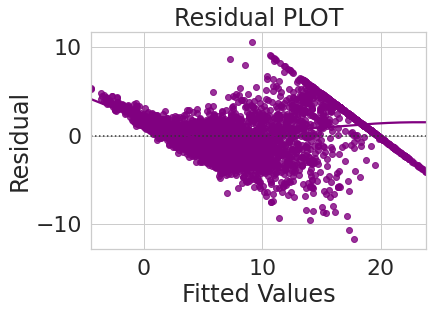

In [1117]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn’t capture non-linear effects.
No pattern in residual hence 1st assumptions is satisfied

### TEST FOR NORMALITY

**What is the test?**

* Error terms/Residuals should be normally distributed

* If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What do non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to Check the Normality?**

* It can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

* Other test to check for normality : Shapiro-Wilk test.

**What is the residuals are not-normal?**

* We can apply transformations like log, exponential, arcsinh etc as per our data

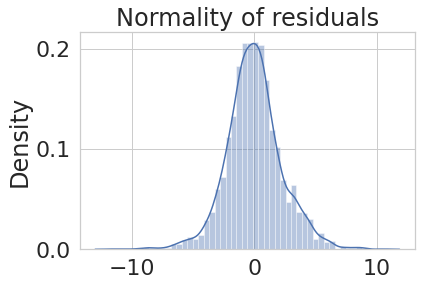

In [1118]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

#### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

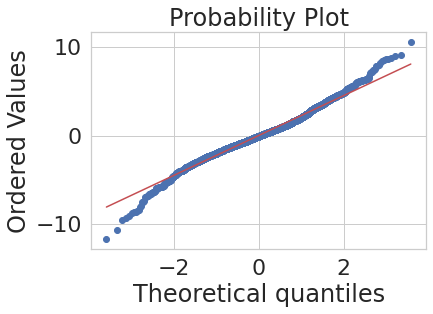

In [1119]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [1120]:
stats.shapiro(residual)

(0.9845901727676392, 8.928699815203186e-21)

* The residuals are not normal as per shapiro test, but as per QQ plot they are approximately normal.
* The issue with shapiro test is when dataset is big, even for small deviations, it shows data as not normal
* Hence we go with QQ plot and say that residuals are normal
* We can try to treat data for outliers and see if that helps in further normalising the residual curve

### TEST FOR HOMOSCEDASTICITY

* Test -goldfeldquandt test

* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals have hetroscedasticity

In [1121]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train8)
lzip(name, test)

[('F statistic', 0.9201719200102704), ('p-value', 0.9697354161662038)]

Since p-value > 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.

### Now we have checked all the assumptions and they are satisfied, so we can move towards prediction part

### Predicting on the test data

In [1122]:
X_train8.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Location_Bangalore', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kolkata',
       'Location_Mumbai', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Transmission_Manual', 'Owner_Type_Second'],
      dtype='object')

* Selecting columns from test data that we used to create our final model

In [1123]:
X_test_final = X_test[X_train8.columns]

In [1124]:
X_test_final.head()

,const,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kolkata,Location_Mumbai,Fuel_Type_Diesel,Fuel_Type_LPG,Transmission_Manual,Owner_Type_Second
4204,1.00,2010,58000.00,16.46,2993.00,232.75,5.00,0,0,0,0,0,0,0,1,0,0,0
605,1.00,2015,73000.00,16.00,2179.00,140.00,7.00,0,0,0,0,0,0,0,1,0,1,0
205,1.00,2015,64103.00,15.73,1968.00,174.33,5.00,0,0,1,0,0,0,0,1,0,0,0
456,1.00,2018,12923.00,25.10,1248.00,88.50,5.00,0,0,1,0,0,0,0,1,0,1,0
1303,1.00,2012,44450.00,22.48,1995.00,190.00,5.00,0,1,0,0,0,0,0,1,0,0,0


In [1125]:
y_pred = olsres7.predict(X_test_final)

### Checking the performance on train and test: metric used - RMSE

In [1126]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)

Train error: 2.2688249279001225
Test error: 2.3153769015684915


### Now we can finally see that we have low test and train error, also both the errors are comparable, so our model is not suffering from overfitting .
### Hence we can conclude the model "olsres7" is good for prediction as well as inference purpose


In [1127]:
olsmod7 = sm.OLS(y_train, X_train8)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1341.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:03:17   Log-Likelihood:                -9199.0
No. Observations:                4110   AIC:                         1.843e+04
Df Residuals:                    4092   BIC:                         1.855e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1159.8936    

### Observations
* Now this is our final model which follows all the assumptions and this can be used for interpretations

          1. Mortality rates come out to be very signifcant, as expected. There are two variable - under_five_deaths and Adult_mortality. As these two increase, the total life expectancy decreases, as visible in the negative coeefficinet sign 
          2. 1 unit increase in alcohol value (per capita consumption of pure alcohol in litres) leads to decrease in life expectancy by 0.0984 years (~35 days !)
          3. Diseases like "Hepatitis B and  HIV-AIDS" decrease the Life expectancy
          4. Developing countries tend to have less life expectancy but as the country status will change to developed, 
             life expectancy will increase too
          5. Year, percentage expenditure, Polio (refers to polio immunization), Diptheria(refers to diptheria immunization), 
             population, Income, Schooling are positively correlated , so as they will increase life expectancy will also 
             incease.

## Forward Feature Selection 
### forward feature selection starts with an empty model and adds in variables one by one.
* In each forward step, you add the one variable that gives the single best improvement to your model.


In [1128]:
X_train_new = X_train3.drop('const', axis = 1)

* We'll use forward feature selection on variables, we received after removing multicollinearity
* Also we'll remove const term, because sklearn adds that automatically unlike statmodels

In [1129]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from sklearn.lin

In [1130]:
X_train_new.shape[1]

22

In [1131]:
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 22,forward=True,
           floating=False, scoring= 'r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.3s finished

[2021-03-20 07:03:17] Features: 1/22 -- score: 0.6764060525271637[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.3s finished

[2021-03-20 07:03:18] Features: 2/22 -- score: 0.7965810349609738[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished

[2021-03-20 07:03:18] Features: 3/22 -- score: 0.809884158701631[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

### We can see that Adjusted-R square starts decreasing after addition of 19th feature, so we will proceed only with best 18 features

* Now we'll change k_features to 18, where k_features denotes "Number of features to select"

In [1132]:
clf = LinearRegression()

# # Build step forward feature selection
sfs1 = sfs(clf,k_features = 20,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.4s finished

[2021-03-20 07:03:24] Features: 1/20 -- score: 0.6764060525271637[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.3s finished

[2021-03-20 07:03:25] Features: 2/20 -- score: 0.7965810349609738[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished

[2021-03-20 07:03:25] Features: 3/20 -- score: 0.809884158701631[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [1133]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21]


In [1134]:
X_train4.columns[feat_cols]

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Kolkata', 'Location_Mumbai', 'Fuel_Type_Diesel',
       'Fuel_Type_LPG', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

### Now we will fit a sklearn model using these features only

In [1135]:
X_train_final = X_train4[X_train4.columns[feat_cols]]

In [1136]:
#
X_test.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [1137]:
#Creating new x_test with the same 18 variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [1138]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train_final, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicted = linearregression.predict(X_train_final)
pred = linearregression.predict(X_test_final)                              

Intercept of the linear equation: [-1153.79781584]

COefficients of the equation are: [[ 0.00000000e+00  5.75150025e-01 -1.87951980e-05 -1.41718389e-01
   8.16427652e-04  6.32095246e-02 -1.43883073e-01  6.43219574e-01
   1.10333532e-01  4.55365976e-01 -4.09053661e-01  8.27799069e-01
  -1.40356526e+00 -5.76832107e-01  2.19633959e+00  1.59173709e+00
  -2.13470456e+00 -9.43398046e-01 -2.52448008e-01 -2.52224699e-01]]


In [1139]:
# R2 Squared: on train and test
print('r2 score on train data :', r2_score(y_train, predicted))
print('r2 score on test data :', r2_score(y_test, pred))

r2 score on train data : 0.8478243597272357
r2 score on test data : 0.8374547965395486


In [1140]:
# RMSE on train and test data
print('rmse on train data :', mean_squared_error(y_train, predicted)**0.5)
print('rmse on test data :', mean_squared_error(y_test, pred)**0.5)

rmse on train data : 2.268451681248256
rmse on test data : 2.3144031275286356


### Both r2 score and RMSE  shows that model fitted is good, has no overfitting and can be used for making predictions 

### we can observe here, the results from 'olsreg7' and 'linearegession' model are approximately same

### In case when we have lots of features, instead of removing features on the basis of p values manually, we can go for forward selection also

# Appendix:


- **warnings.filterwarnings("ignore")** : Never print matching warnings.

- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **Numpy** : The fundamental package for scientific computing with Python.

- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **pairplot** : Plot pairwise relationships in a dataset.

- **boxplot** : Draw a box plot to show distributions with respect to categories.

- **distplot** : Flexibly plot a univariate distribution of observations.

- **pandas.DataFrame.corr** : Compute pairwise correlation of columns, excluding NA/null values.

- **sklearn.linear_model.LinearRegression** : Ordinary least squares Linear Regression.

- **scipy.stats** : This module contains a large number of probability distributions as well as a growing library of statistical functions.

- **statsmodels** : It is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
    - An extensive list of result statistics are available for each estimator.
    - The results are tested against existing statistical packages to ensure that they are correct.
    - The online documentation is hosted at [statsmodels.org](https://www.statsmodels.org/stable/index.html).